In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [161]:
def is_free_cancellation_policy(policy: str):
    free_policy = "0D0N"
    return free_policy == policy

def is_severe_policy(policy: str):
    return policy == "365D100P_100P"

def get_least_precentage(data):
    policy_string = data['cancellation_policy_code']
    trip_days =data['Vacation_length']
    if policy_string == "UNKNOWN":
        return 90
    
    least_problematic_policy = policy_string.split("_")[0]
    
    if least_problematic_policy[-1] == "N":
        nights_to_pay = (least_problematic_policy[:-1]).split("D")[-1]
        return int(nights_to_pay) / trip_days * 100
    else:
        precentage_p = (least_problematic_policy[:-1]).split("D")[-1]
        return  int(precentage_p)
    
def is_unknown_policy(policy_string: str):
    return policy_string == "UNKNOWN"

def get_group_size(data):
    return data['no_of_adults'] + data['no_of_children']

In [177]:
# parse_dates = ['booking_datetime', 'checkin_date', 'checkout_date', 'hotel_live_date', 'cancellation_datetime']
data = pd.read_csv(r"C:\Users\t8883217\Desktop\IML\Challenge\week1\agoda_cancellation_train.csv")
data['group_size'] = data.apply(get_group_size, axis =1)
data['cancellation_datetime']= pd.to_datetime(data['cancellation_datetime'])
data['checkin_date']= pd.to_datetime(data['checkin_date'],dayfirst = True)
data['checkout_date']= pd.to_datetime(data['checkout_date'],dayfirst = True)
data['booking_datetime']= pd.to_datetime(data['booking_datetime'],dayfirst = True)

display(data[["checkin_date", "booking_datetime"]])   

data.loc[data['cancellation_datetime'].notnull(), 'cancellation'] = 1
data.loc[data['cancellation_datetime'].isnull(), 'cancellation'] = 0
data.loc[data['charge_option'] == "Pay Later", 'payment_option'] = 1
data.loc[data['charge_option'] == "Pay Now", 'payment_option'] = 0
data.loc[data['charge_option'] == "Pay at Check-in", 'payment_option'] = 0

data.loc[data['cancellation_policy_code'].str[-5:] == "_100P", 'no_show_100P'] = 1
data.loc[data['cancellation_policy_code'].str[-5:] != "_100P", 'no_show_100P'] = 0

data.loc[data['cancellation_policy_code'].str.contains("_"), 'policy_is_changing'] = 1
data.loc[~data['cancellation_policy_code'].str.contains("_"), 'policy_is_changing'] = 0

data['Vacation_length'] = ((data['checkout_date'] - data['checkin_date'])/np.timedelta64(1, 'D'))
data['Booking_to_checkin'] = ((data['checkin_date'] - data['booking_datetime'])/np.timedelta64(1, 'D'))
data['is_severe_policy'] = data['cancellation_policy_code'].apply(lambda x: is_severe_policy(x))
data['Days_from_checkin'] = ((data.loc[data['cancellation'] == 1]['checkin_date'] - data.loc[data['cancellation'] == 1]['cancellation_datetime'])/np.timedelta64(1, 'D'))
data['Days_after_booking'] = ((data.loc[data['cancellation'] == 1]['cancellation_datetime'] - data.loc[data['cancellation'] == 1]['booking_datetime'])/np.timedelta64(1, 'D'))
print(data['Days_from_checkin'])                         
data['min_precentage_to_pay'] = data.apply(get_least_precentage, axis =1)
display(data[["checkin_date", "booking_datetime", "Booking_to_checkin"]])                        
data = data.drop(['h_booking_id', 'booking_datetime', 'checkout_date',
       'hotel_id', 'hotel_country_code', 'hotel_live_date',
       'accommadation_type_name', 'h_customer_id', 'customer_nationality',
       'guest_nationality_country_name', 'original_payment_type',"original_payment_currency",
       'no_of_extra_bed', 'no_of_room', 'origin_country_code', 'language', "original_payment_method",       
        'request_nonesmoke', 'request_latecheckin', 'request_highfloor',
       'request_largebed', 'request_twinbeds', 'request_airport', 'cancellation_policy_code',
       'request_earlycheckin', 'hotel_area_code','no_of_children',
       'hotel_brand_code', 'hotel_chain_code', 'hotel_city_code',"charge_option"],1) #TO ADD: , 'accommadation_type_name', original_payment_currency
data

,checkin_date,booking_datetime
0,2018-07-09,2018-06-28 21:15:00
1,2018-08-16,2018-08-10 22:31:00
2,2018-09-14,2018-09-14 07:55:00
3,2018-07-02,2018-06-25 07:33:00
4,2018-08-09,2018-07-23 10:06:00
...,...,...
58654,2018-08-04,2018-07-18 22:07:00
58655,2018-09-06,2018-09-05 12:07:00
58656,2018-08-09,2018-06-08 23:23:00
58657,2018-09-10,2018-09-02 08:18:00


0         NaN
1         NaN
2         NaN
3         NaN
4        17.0
         ... 
58654    13.0
58655     NaN
58656     NaN
58657     NaN
58658     NaN
Name: Days_from_checkin, Length: 58659, dtype: float64


,checkin_date,booking_datetime,Booking_to_checkin
0,2018-07-09,2018-06-28 21:15:00,10.114583
1,2018-08-16,2018-08-10 22:31:00,5.061806
2,2018-09-14,2018-09-14 07:55:00,-0.329861
3,2018-07-02,2018-06-25 07:33:00,6.685417
4,2018-08-09,2018-07-23 10:06:00,16.579167
...,...,...,...
58654,2018-08-04,2018-07-18 22:07:00,16.078472
58655,2018-09-06,2018-09-05 12:07:00,0.495139
58656,2018-08-09,2018-06-08 23:23:00,61.025694
58657,2018-09-10,2018-09-02 08:18:00,7.654167


,checkin_date,hotel_star_rating,guest_is_not_the_customer,no_of_adults,original_selling_amount,is_user_logged_in,is_first_booking,cancellation_datetime,group_size,cancellation,payment_option,no_show_100P,policy_is_changing,Vacation_length,Booking_to_checkin,is_severe_policy,Days_from_checkin,Days_after_booking,min_precentage_to_pay
0,2018-07-09,4.0,0,2,267.55,False,True,NaT,2,0.0,0.0,1.0,1.0,4.0,10.114583,True,NaN,NaN,100.0
1,2018-08-16,4.0,0,2,114.15,False,False,NaT,2,0.0,1.0,0.0,1.0,1.0,5.061806,False,NaN,NaN,100.0
2,2018-09-14,4.0,0,2,115.79,False,True,NaT,2,0.0,0.0,0.0,1.0,1.0,-0.329861,False,NaN,NaN,100.0
3,2018-07-02,3.0,0,2,68.74,True,False,NaT,2,0.0,1.0,1.0,1.0,1.0,6.685417,False,NaN,NaN,100.0
4,2018-08-09,3.0,0,8,127.76,False,True,2018-07-23,8,1.0,1.0,1.0,1.0,1.0,16.579167,False,17.0,-0.420833,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58654,2018-08-04,2.0,1,2,11.12,True,False,2018-07-22,2,1.0,0.0,0.0,0.0,1.0,16.078472,False,13.0,3.078472,100.0
58655,2018-09-06,4.0,0,2,89.38,False,False,NaT,4,0.0,0.0,1.0,1.0,2.0,0.495139,False,NaN,NaN,100.0
58656,2018-08-09,5.0,0,2,404.52,True,False,NaT,2,0.0,0.0,1.0,1.0,2.0,61.025694,True,NaN,NaN,100.0
58657,2018-09-10,0.0,0,1,65.88,False,True,NaT,1,0.0,0.0,1.0,1.0,2.0,7.654167,True,NaN,NaN,100.0


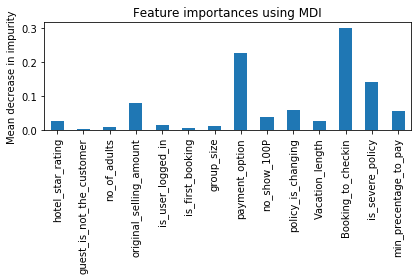

In [187]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import Pool, CatBoostClassifier
from sklearn import metrics
# Split dataset into features and labels

y=data["cancellation"]  
X = data.drop(["cancellation", 'Days_from_checkin','Days_after_booking', "cancellation_datetime"],1)

# Split dataset into training set and test set
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.40, random_state=5) # 70% training and 30% test
X_validation, X_test, y_validation, y_test = train_test_split(X_tv, y_tv, test_size=0.50, random_state=5) # 70% training and 30% test

include_checkin_date = X_test

X_test = X_test.drop("checkin_date",1)
X_validation = X_validation.drop("checkin_date",1)
X_train = X_train.drop("checkin_date",1)



clf=RandomForestClassifier(n_estimators=300, min_samples_leaf=20, max_depth=19)
clf.fit(X_train,y_train)
# print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
# print("Precision:",metrics.precision_score(y_train, y_pred_train))
# print("Re-call:",metrics.recall_score(y_train, y_pred_train))


feature_names = [featureName for (featureName, featureData) in X_test.iteritems()]
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [188]:
df_train = data.loc[data['cancellation_datetime'].notnull()]
X2 = df_train.drop(['Days_after_booking', "cancellation"], axis = 1)
Y2 = df_train['Days_from_checkin']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
     X2, Y2, test_size=0.33, random_state=42)

X_train_2 = X_train_2.drop(['cancellation_datetime',"Days_from_checkin", "checkin_date"], axis = 1)
X_test_2 = X_test_2.drop('cancellation_datetime', axis = 1)

regression = RandomForestRegressor(n_estimators = 300, max_depth = 17,random_state = 8)
regression.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=8, verbose=0, warm_start=False)

In [199]:
parse_dates = ['booking_datetime', 'checkin_date', 'checkout_date', 'hotel_live_date']
data = pd.read_csv(r"C:\Users\t8883217\Desktop\IML\Challenge\week1\test_set_week_1.csv", parse_dates=parse_dates)
data['group_size'] = data.apply(get_group_size, axis =1)
data['checkin_date']= pd.to_datetime(data['checkin_date'])
data['checkout_date']= pd.to_datetime(data['checkout_date'])
data['booking_datetime']= pd.to_datetime(data['booking_datetime'])

data.loc[data['charge_option'] == "Pay Later", 'payment_option'] = 1
data.loc[data['charge_option'] == "Pay Now", 'payment_option'] = 0
data.loc[data['charge_option'] == "Pay at Check-in", 'payment_option'] = 0

data.loc[data['cancellation_policy_code'].str[-5:] == "_100P", 'no_show_100P'] = 1
data.loc[data['cancellation_policy_code'].str[-5:] != "_100P", 'no_show_100P'] = 0

data.loc[data['cancellation_policy_code'].str.contains("_"), 'policy_is_changing'] = 1
data.loc[~data['cancellation_policy_code'].str.contains("_"), 'policy_is_changing'] = 0

data['Vacation_length'] = ((data['checkout_date'] - data['checkin_date'])/np.timedelta64(1, 'D'))
data['Booking_to_checkin'] = ((data['checkin_date'] - data['booking_datetime'])/np.timedelta64(1, 'D'))
data['is_severe_policy'] = data['cancellation_policy_code'].apply(lambda x: is_severe_policy(x))
data['min_precentage_to_pay'] = data.apply(get_least_precentage, axis =1)
           
display(data[["checkin_date", "booking_datetime"]])                
data = data.drop(['h_booking_id', 'booking_datetime', 'checkout_date',
       'hotel_id', 'hotel_country_code', 'hotel_live_date',
       'accommadation_type_name', 'h_customer_id', 'customer_nationality',
       'guest_nationality_country_name', 'original_payment_type',"original_payment_currency",
       'no_of_extra_bed', 'no_of_room', 'origin_country_code', 'language', "original_payment_method",       
        'request_nonesmoke', 'request_latecheckin', 'request_highfloor',
       'request_largebed', 'request_twinbeds', 'request_airport', 'cancellation_policy_code',
       'request_earlycheckin', 'hotel_area_code','no_of_children',
       'hotel_brand_code', 'hotel_chain_code', 'hotel_city_code',"charge_option"],1) #TO ADD: , 'accommadation_type_name', original_payment_currency
data

,checkin_date,booking_datetime
0,2018-12-16,2018-11-25 15:55:00
1,2018-12-16,2018-02-11 15:25:00
2,2018-12-16,2018-11-22 11:39:00
3,2018-12-16,2018-11-26 15:22:00
4,2018-12-16,2018-11-18 19:15:00
...,...,...
695,2019-10-14,2018-11-15 08:40:00
696,2019-10-17,2018-11-23 18:07:00
697,2019-10-18,2018-11-13 22:12:00
698,2019-06-11,2018-11-20 02:06:00


,checkin_date,hotel_star_rating,guest_is_not_the_customer,no_of_adults,original_selling_amount,is_user_logged_in,is_first_booking,group_size,payment_option,no_show_100P,policy_is_changing,Vacation_length,Booking_to_checkin,is_severe_policy,min_precentage_to_pay
0,2018-12-16,2.0,1,2,97.48,True,False,3,1.0,0.0,1.0,1.0,20.336806,False,100.0
1,2018-12-16,5.0,0,2,199.56,False,True,4,1.0,1.0,1.0,1.0,307.357639,False,100.0
2,2018-12-16,5.0,1,2,647.19,False,False,2,0.0,1.0,1.0,3.0,23.514583,True,100.0
3,2018-12-16,5.0,0,10,4192.70,True,False,10,0.0,0.0,0.0,2.0,19.359722,False,100.0
4,2018-12-16,4.5,0,2,570.45,True,False,3,0.0,1.0,1.0,1.0,27.197917,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2019-10-14,3.0,0,2,253.10,False,True,2,0.0,0.0,0.0,3.0,332.638889,False,90.0
696,2019-10-17,3.0,0,2,22.05,True,False,2,0.0,1.0,1.0,1.0,327.245139,False,100.0
697,2019-10-18,4.0,0,3,1511.70,True,False,3,0.0,0.0,0.0,10.0,338.075000,False,90.0
698,2019-06-11,4.0,0,3,164.84,True,False,3,1.0,1.0,1.0,30.0,202.912500,False,100.0


KeyError: "['booking_datetime'] not in index"

In [191]:
include_checkin_date = data

test = include_checkin_date.drop("checkin_date",1)

y_pred=clf.predict(test)

cancel_date = include_checkin_date.loc[y_pred==1]['checkin_date']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002795BAEF7C8>]],
      dtype=object)

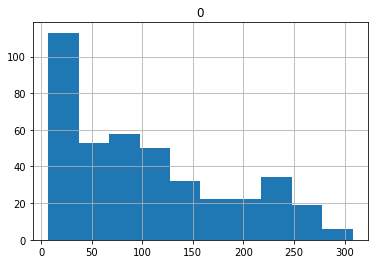

In [192]:
df_cancel = test.loc[y_pred == 1]
# df_cancel_true = df_cancel["Days_from_checkin"]
# df_cancel = df_cancel.drop(['Days_from_checkin', 'Days_after_booking'], axis = 1)
pred = regression.predict(df_cancel)
# train_pred = regression.predict(X_train_2)
# pd.DataFrame(df_cancel_true).hist(bins=10)
pd.DataFrame(pred).hist(bins=10)
# pd.DataFrame(train_pred).hist(bins=10)

In [202]:
# display(pd.DataFrame(abs(regression.coef_)))
# display(X.columns)
# plt.bar(X_train.columns, abs(regression.coef_))
# plt.tight_layout()
display(pred.shape, cancel_date.shape)
pred_date = cancel_date - pd.to_timedelta(pred, unit = "D")
display(pred_date.to_frame())
start_date = pd.to_datetime('2018-12-07')
end_date = pd.to_datetime('2018-12-13')

prediction_binary = pred_date.between(start_date, end_date)
display(prediction_binary)
display(pred)

(409,)

(409,)

,0
0,2018-12-01 19:25:40.669363200
1,2018-05-29 05:55:12.000028800
8,2018-09-14 22:21:14.864601600
9,2018-09-07 18:55:48.620352000
11,2018-08-24 19:06:12.743452800
...,...
692,2019-04-24 16:42:23.999990400
693,2019-01-21 01:26:24.000000000
694,2019-04-20 10:22:14.399990400
697,2018-12-20 14:43:11.999971200


0      False
1      False
8      False
9      False
11     False
       ...  
692    False
693    False
694    False
697    False
698    False
Length: 409, dtype: bool

array([ 14.19050151, 200.75333333,  92.06857796,  99.21124282,
       113.20401917,  11.0790257 , 114.89552113,  18.56255573,
        19.55475286,  17.34164308,  16.79257423,  22.50574581,
        55.4345257 ,  15.84635045,   7.19959285, 210.44333333,
        17.60253918,  19.36393778,  16.96968042, 221.98828846,
        18.59414403,  52.84757322, 217.01194444,  12.31484531,
       107.47790198,  16.48569476,  20.53539948,  35.09766014,
        19.51202889,  16.03473553,  20.47407735,  19.00537522,
        18.35554892,  26.87078914,  23.99237187, 216.43461668,
       191.08333333, 113.14051009,  76.36931049,  30.05708738,
        23.73142005, 112.24766068,  25.24661547, 180.21977778,
        21.25736867, 118.73801281,  24.06861252, 185.87383013,
       179.45666667,  98.83894042,  18.85227398,  55.25975463,
        27.12498729,  18.89446626, 109.77099597,  22.4998227 ,
        52.33905402,  26.91933094,  23.63098508, 274.19666667,
        12.5271384 ,  23.34899873,  27.87200049,  20.22

In [203]:
# prediction_binary.count()
item_counts = prediction_binary.value_counts()
item_counts


False    377
True      32
dtype: int64

In [204]:
# display(include_checkin_date[])
include_checkin_date.insert(1, "prediction_value", prediction_binary)
include_checkin_date

,checkin_date,prediction_value,hotel_star_rating,guest_is_not_the_customer,no_of_adults,original_selling_amount,is_user_logged_in,is_first_booking,group_size,payment_option,no_show_100P,policy_is_changing,Vacation_length,Booking_to_checkin,is_severe_policy,min_precentage_to_pay
0,2018-12-16,False,2.0,1,2,97.48,True,False,3,1.0,0.0,1.0,1.0,20.336806,False,100.0
1,2018-12-16,False,5.0,0,2,199.56,False,True,4,1.0,1.0,1.0,1.0,307.357639,False,100.0
2,2018-12-16,NaN,5.0,1,2,647.19,False,False,2,0.0,1.0,1.0,3.0,23.514583,True,100.0
3,2018-12-16,NaN,5.0,0,10,4192.70,True,False,10,0.0,0.0,0.0,2.0,19.359722,False,100.0
4,2018-12-16,NaN,4.5,0,2,570.45,True,False,3,0.0,1.0,1.0,1.0,27.197917,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2019-10-14,NaN,3.0,0,2,253.10,False,True,2,0.0,0.0,0.0,3.0,332.638889,False,90.0
696,2019-10-17,NaN,3.0,0,2,22.05,True,False,2,0.0,1.0,1.0,1.0,327.245139,False,100.0
697,2019-10-18,False,4.0,0,3,1511.70,True,False,3,0.0,0.0,0.0,10.0,338.075000,False,90.0
698,2019-06-11,False,4.0,0,3,164.84,True,False,3,1.0,1.0,1.0,30.0,202.912500,False,100.0


In [205]:
include_checkin_date["prediction_value"]=include_checkin_date["prediction_value"].fillna(False)
include_checkin_date

,checkin_date,prediction_value,hotel_star_rating,guest_is_not_the_customer,no_of_adults,original_selling_amount,is_user_logged_in,is_first_booking,group_size,payment_option,no_show_100P,policy_is_changing,Vacation_length,Booking_to_checkin,is_severe_policy,min_precentage_to_pay
0,2018-12-16,False,2.0,1,2,97.48,True,False,3,1.0,0.0,1.0,1.0,20.336806,False,100.0
1,2018-12-16,False,5.0,0,2,199.56,False,True,4,1.0,1.0,1.0,1.0,307.357639,False,100.0
2,2018-12-16,False,5.0,1,2,647.19,False,False,2,0.0,1.0,1.0,3.0,23.514583,True,100.0
3,2018-12-16,False,5.0,0,10,4192.70,True,False,10,0.0,0.0,0.0,2.0,19.359722,False,100.0
4,2018-12-16,False,4.5,0,2,570.45,True,False,3,0.0,1.0,1.0,1.0,27.197917,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2019-10-14,False,3.0,0,2,253.10,False,True,2,0.0,0.0,0.0,3.0,332.638889,False,90.0
696,2019-10-17,False,3.0,0,2,22.05,True,False,2,0.0,1.0,1.0,1.0,327.245139,False,100.0
697,2019-10-18,False,4.0,0,3,1511.70,True,False,3,0.0,0.0,0.0,10.0,338.075000,False,90.0
698,2019-06-11,False,4.0,0,3,164.84,True,False,3,1.0,1.0,1.0,30.0,202.912500,False,100.0


In [206]:
include_checkin_date.to_csv("213096175_.csv",index=False)

In [209]:
include_checkin_date["prediction_value"].to_csv("212422794_212618169_213096175.csv", index = False)